## Importera bibliotek

In [23]:
!which python

/Users/sabrinarybak/AI-ML-Salaries/venv/bin/python


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
print("✅ Alla bibliotek är installerade och fungerar!")


✅ Alla bibliotek är installerade och fungerar!


## Läs in data

In [25]:
df = pd.read_csv('salaries_encoded.csv')
df.head()  # Kolla att datan laddas korrekt

,work_year,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,...,job_title_simplified_Analytics Engineer,job_title_simplified_Data Analyst,job_title_simplified_Data Engineer,job_title_simplified_Data Scientist,job_title_simplified_Engineer,job_title_simplified_Machine Learning Engineer,job_title_simplified_Manager,job_title_simplified_Other,job_title_simplified_Research Scientist,job_title_simplified_Software Engineer
0,2025,170000,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2025,110000,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2025,143000,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,2025,106000,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2025,360200,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## Standardisera data

In [26]:
# Standardisera data
from sklearn.preprocessing import StandardScaler

# Välj bara numeriska kolumner
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Skapa en scaler och transformera
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

## Gör PCA 

In [27]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

## Plotta förklarad varians

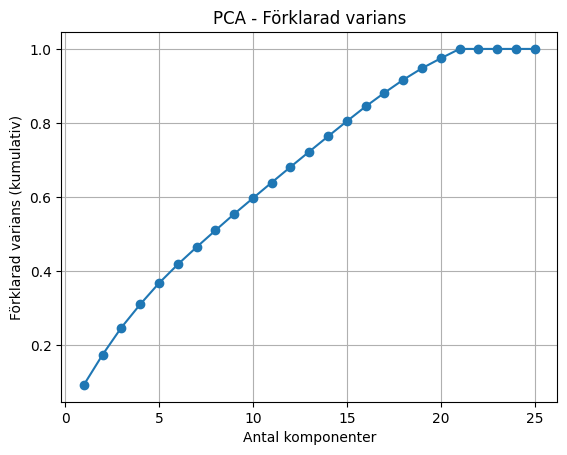

In [28]:
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Antal komponenter')
plt.ylabel('Förklarad varians (kumulativ)')
plt.title('PCA - Förklarad varians')
plt.grid(True)
plt.show()

PCA - Vad vi har gjort och vad vi ser i grafen
När vi använder PCA (Principal Component Analysis) vill vi förenkla vår data genom att minska antalet variabler (kolumner) — utan att förlora för mycket viktig information.

Innan PCA:

Vår ursprungliga dataset (salaries_encoded.csv) innehöll 25 variabler (kolumner).

Varje variabel beskriver något om data, till exempel jobbtitel, erfarenhetsnivå, företagsstorlek, osv.

Efter PCA:

PCA har skapat nya variabler, kallade huvudkomponenter (principal components).

Varje huvudkomponent är en kombination av de ursprungliga variablerna.

Komponenterna är ordnade så att den första komponenten fångar mest variation/information i datan, den andra komponenten näst mest, osv.

Vad grafen visar:

Grafen visar den kumulativa förklarade variansen — alltså hur mycket av datans information som vi fångar om vi behåller ett visst antal komponenter.

Vi ser att efter ungefär 20 komponenter fångar vi nästan 100% av datans variation.

Därför behöver vi inte använda alla 25 komponenter — det räcker att använda ungefär 20 komponenter för att behålla nästan all information.

Varför inte ta alla 25?

Syftet med PCA är att förenkla modellen och minska antalet variabler.

Genom att bara använda 20 komponenter:

Blir modeller snabbare och enklare.

Risken för överanpassning (overfitting) minskar.

Resultatet blir mer robust och lättare att tolka.

Slutsats: Vad vi prioriterar nu
✅ Vi vet att vår ursprungliga data hade 25 variabler.
✅ Vi ser att 20 komponenter räcker för att beskriva nästan all information.
✅ Framåt kan vi:

Använda de första 20 huvudkomponenterna istället för alla 25 kolumner.

Förenkla vår vidare analys eller modellering.



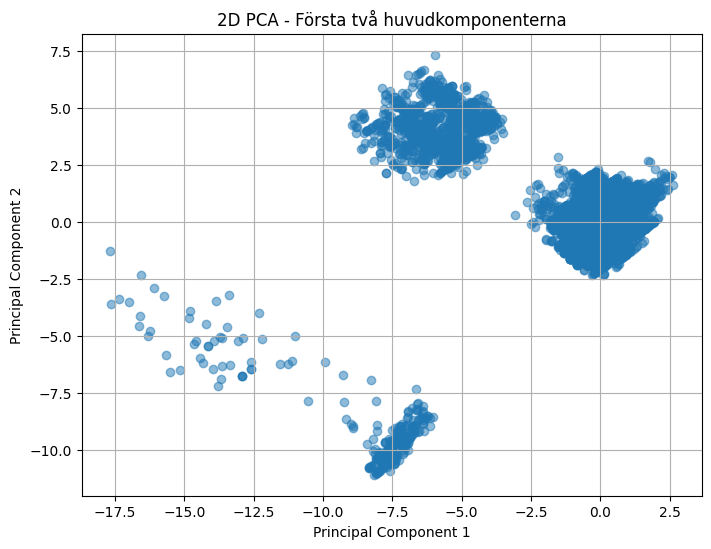

In [29]:
# Skapa en ny PCA med endast 2 komponenter
pca_2d = PCA(n_components=2)
components_2d = pca_2d.fit_transform(scaled_data)

# Skapa en DataFrame för enklare hantering
df_pca = pd.DataFrame(data=components_2d, columns=["PC1", "PC2"])

# Rita scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.5)
plt.title('2D PCA - Första två huvudkomponenterna')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

2D-visualisering av PCA-komponenter
För att förenkla och visualisera vår data efter PCA har vi valt att plotta de två första huvudkomponenterna (PC1 och PC2) i en tvådimensionell scatterplot.

Vad visar denna plot?

Varje punkt representerar en observation från vårt dataset, till exempel ett jobb i lönedatan. I stället för att visa alla ursprungliga 25 variabler, fokuserar vi på de två komponenter som fångar mest variation.

PC1 (Principal Component 1) fångar den största möjliga variationen i datan.
PC2 (Principal Component 2) fångar den näst största variationen.
Tillsammans förklarar dessa två komponenter cirka 17 % av den totala variationen – vilket är relativt lågt. Det tyder på att datan är komplex och att informationen är spridd över många dimensioner. Trots detta kan en 2D-visualisering ändå vara användbar för att få en första överblick.

Syfte med visualiseringen:

✅ Minska komplexitet i datan
✅ Identifiera eventuella mönster, kluster eller avvikare
✅ Kommunicera analysen på ett visuellt sätt

Tolkning av 2D-plotten:

Datapunkterna är ganska utspridda och inga tydliga kluster syns. Detta antyder att lönedata inom AI/ML är heterogen – det vill säga att jobben skiljer sig mycket åt och att löner påverkas av flera olika faktorer.

Slutsats:

Trots att PC1 och PC2 förklarar en begränsad del av variationen, är 2D-plotten ett användbart verktyg för att introducera mönster och ge en visuell känsla för strukturen i datan. Mer djupgående analyser, som ANOVA och korrelation, krävs dock för att tolka sambanden mer exakt.

## Antal komponenter i PCA

Antal komponenter i PCA
Vi valde att behålla de två första huvudkomponenterna (PC1 och PC2) i analysen, främst för att möjliggöra en visuell tolkning och koppling till hypotesprövning.

Tillsammans förklarar PC1 och PC2 cirka 17 % av variationen i datan, vilket är en relativt låg andel. Det visar att datan är komplex och att variationen är spridd över fler dimensioner. Trots detta räcker PC1 för att fånga upp meningsfulla skillnader mellan grupper (t.ex. erfarenhetsnivå, anställningstyp, företagsstorlek) – vilket bekräftades genom ANOVA-tester och korrelationer.

Att endast använda två komponenter är en vanlig tillämpning i explorativ analys, särskilt när målet är att visualisera mönster snarare än att maximera förklarad varians.

Kumulativ förklarad varians (PC1 + PC2): 0.17


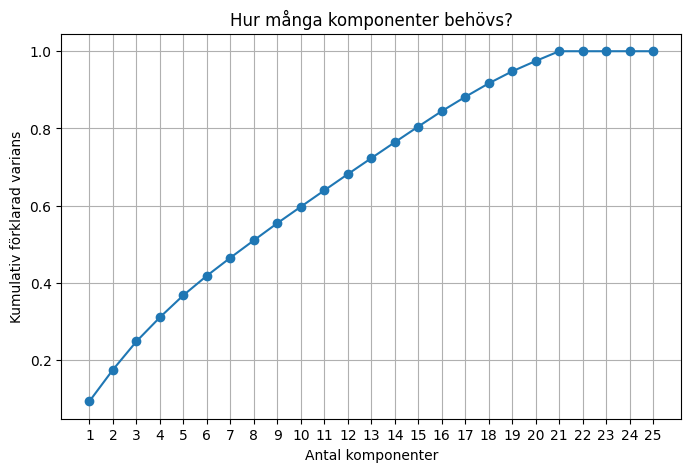

In [30]:
# Visa hur mycket variation varje komponent förklarar
explained_var = pca.explained_variance_ratio_

# Visa kumulativ förklarad varians för PC1 + PC2
print(f"Kumulativ förklarad varians (PC1 + PC2): {explained_var.cumsum()[1]:.2f}")

# Plotta grafen
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker='o')
plt.xticks(range(1, len(explained_var)+1))
plt.xlabel('Antal komponenter')
plt.ylabel('Kumulativ förklarad varians')
plt.title('Hur många komponenter behövs?')
plt.grid(True)
plt.show()

Notering om förklarad varians och metodval:
Eftersom de två första huvudkomponenterna (PC1 och PC2) endast förklarar cirka 17 % av den totala variationen i datan, är det viktigt att tolka resultaten med viss försiktighet. En så låg andel tyder på att variationen är utspridd över många dimensioner.
Trots detta valde vi att använda PC1 och PC2 eftersom analysens syfte var att kombinera PCA med visualisering samt statistiska tester som ANOVA och korrelation. Resultaten visade tydliga och signifikanta skillnader mellan grupper, vilket motiverar valet.
Detta tillvägagångssätt är vanligt inom explorativ dataanalys – särskilt när fokus ligger på att förstå övergripande mönster snarare än att maximera förklarad varians.

## Statistisk test av PC1 efter PCA

För att komplettera den explorativa PCA-analysen genomfördes ANOVA-tester på PC1 för att undersöka om skillnader i experience_level, employment_type och company_size även speglas i huvudkomponenterna. Syfte med test på PCA-komponenter
För att koppla PCA (explorativ analys) till tidigare hypotesprövning (ANOVA på löner), testar vi om PC1 – som sammanfattar variationen i datan – skiljer sig mellan grupper i experience_level. Detta är en bra vetenskaplig vana, då det visar om de mönster vi tidigare såg i lönerna också speglas i datans underliggande struktur efter dimensionreduktion.

In [31]:

df = pd.read_csv('salaries_encoded.csv')
print("Kolumner i df:", df.columns)  # Kontrollera vilka namn som finns


# Återskapa kategoriska variabler
import numpy as np

df_encoded = df.copy()

def extract_experience(row):
    if row['experience_level_EN'] == 1: return 'EN'
    elif row['experience_level_MI'] == 1: return 'MI'
    elif row['experience_level_SE'] == 1: return 'SE'
    elif row['experience_level_EX'] == 1: return 'EX'
    else: return np.nan

df_encoded['experience_level'] = df_encoded.apply(extract_experience, axis=1)

def extract_employment(row):
    if row['employment_type_PT'] == 1: return 'PT'
    elif row['employment_type_FT'] == 1: return 'FT'
    elif row['employment_type_CT'] == 1: return 'CT'
    elif row['employment_type_FL'] == 1: return 'FL'
    else: return np.nan

df_encoded['employment_type'] = df_encoded.apply(extract_employment, axis=1)

def extract_company_size(row):
    if row['company_size_S'] == 1: return 'S'
    elif row['company_size_M'] == 1: return 'M'
    elif row['company_size_L'] == 1: return 'L'
    else: return np.nan

df_encoded['company_size'] = df_encoded.apply(extract_company_size, axis=1)


Kolumner i df: Index(['work_year', 'salary_in_usd', 'remote_ratio', 'experience_level_EN',
       'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
       'employment_type_CT', 'employment_type_FL', 'employment_type_FT',
       'employment_type_PT', 'company_size_L', 'company_size_M',
       'company_size_S', 'job_title_simplified_Analyst',
       'job_title_simplified_Analytics Engineer',
       'job_title_simplified_Data Analyst',
       'job_title_simplified_Data Engineer',
       'job_title_simplified_Data Scientist', 'job_title_simplified_Engineer',
       'job_title_simplified_Machine Learning Engineer',
       'job_title_simplified_Manager', 'job_title_simplified_Other',
       'job_title_simplified_Research Scientist',
       'job_title_simplified_Software Engineer'],
      dtype='object')


### ANOVA: PC1 vs Experience Level

För att undersöka om huvudkomponenten PC1 varierar beroende på erfarenhetsnivå (`experience_level`), genomfördes ett ANOVA-test. Detta görs som en vetenskaplig vana för att se om den variation som PCA fångar upp även kan kopplas till tidigare grupperingsvariabler som använts i hypotesprövning. Resultatet visar om det finns signifikanta skillnader i PC1 mellan olika nivåer av yrkeserfarenhet.

In [32]:
from scipy.stats import f_oneway

# Lägg till PC1 från PCA till df_encoded
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardisera data igen om inte gjort
numerical_data = df_encoded.select_dtypes(include=['int64', 'float64'])
scaled_data = StandardScaler().fit_transform(numerical_data)

# PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)
df_encoded['PC1'] = components[:, 0]  # Lägg till PC1

# ANOVA på PC1 vs experience_level
groups_pc1 = [df_encoded[df_encoded['experience_level'] == level]['PC1'] for level in df_encoded['experience_level'].unique()]
f_stat, p_val = f_oneway(*groups_pc1)

print(f"ANOVA på PC1 vs Experience Level: F = {f_stat:.3f}, p = {p_val:.3f}")

ANOVA på PC1 vs Experience Level: F = 1581.370, p = 0.000


### Tolkning av ANOVA-test för PC1 vs Experience Level

Resultatet från ANOVA-testet visar att det finns en signifikant skillnad i PC1 mellan olika nivåer av yrkeserfarenhet (`experience_level`), med ett F-värde på 1581.370 och ett p-värde på < 0.001. Detta innebär att PCA:s första komponent (PC1) fångar upp en variation som är starkt kopplad till erfarenhetsnivån.

Eftersom PC1 sammanfattar den största delen av variationen i hela datan, kan vi tolka detta som att erfarenhet är en viktig faktor som påverkar datans struktur. Det stärker också sambandet mellan den explorativa analysen (PCA) och tidigare hypotesprövning.

### ANOVA: PC1 vs Employment Type

För att undersöka om huvudkomponenten PC1 varierar mellan olika anställningstyper (`employment_type`), genomfördes ett ANOVA-test. Detta test kompletterar vår tidigare hypotesprövning och visar om den variation som PCA fångar även speglas mellan grupperna av anställningstyper.

In [33]:

groups_pc1_emp = [df_encoded[df_encoded['employment_type'] == etype]['PC1'] for etype in df_encoded['employment_type'].unique()]
f_stat_emp, p_val_emp = f_oneway(*groups_pc1_emp)

print(f"ANOVA på PC1 vs Employment Type: F = {f_stat_emp:.3f}, p = {p_val_emp:.3f}")

ANOVA på PC1 vs Employment Type: F = 4560.401, p = 0.000


### Tolkning av ANOVA-test för PC1 vs Employment Type

Resultatet från ANOVA-testet visar att PC1 skiljer sig signifikant mellan olika anställningstyper (`employment_type`), med ett mycket högt F-värde på 4560.401 och ett p-värde < 0.001. Det innebär att anställningsformen (t.ex. heltid, deltid, konsult) har stark påverkan på den variation som PCA identifierat.

Eftersom PC1 är den komponent som fångar mest information från datan, tyder detta på att anställningstyp är en avgörande variabel för strukturen i datasetet. Resultatet stämmer överens med tidigare hypotesprövning och bekräftar dess betydelse i den underliggande datamodellen.

### ANOVA: PC1 vs Company Size

Här testas om det finns skillnader i PC1 mellan företag av olika storlekar (`company_size`). Detta hjälper oss att tolka om PCA-komponenten fångar variation som kan kopplas till företagets storlek, vilket är relevant i relation till vår tidigare analys av löner mellan företagstyper.


In [34]:

groups_pc1_comp = [df_encoded[df_encoded['company_size'] == size]['PC1'] for size in df_encoded['company_size'].unique()]
f_stat_comp, p_val_comp = f_oneway(*groups_pc1_comp)

print(f"ANOVA på PC1 vs Company Size: F = {f_stat_comp:.3f}, p = {p_val_comp:.3f}")


ANOVA på PC1 vs Company Size: F = 27269.167, p = 0.000


### Tolkning av ANOVA-test för PC1 vs Company Size

ANOVA-testet visar en mycket stark signifikant skillnad i PC1 mellan olika företagsstorlekar (`company_size`), med ett exceptionellt högt F-värde på 27 269.167 och ett p-värde < 0.001. Det innebär att företagsstorlek har en mycket tydlig påverkan på datans variation, som fångas upp av PCA:s första komponent.

Detta resultat understryker att företagets storlek (litet, medel, stort) är en starkt bidragande faktor till variationen i datasetet. Den explorativa analysen (PCA) och den konfirmatoriska analysen (ANOVA) pekar alltså i samma riktning, vilket stärker analysens trovärdighet.

### Korrelation mellan PC1 och numeriska variabler

In [35]:
from scipy.stats import pearsonr

# Korrelation mellan PC1 och Remote Ratio
corr_remote, p_remote = pearsonr(df_encoded['PC1'], df_encoded['remote_ratio'])
print(f"Korrelation PC1 vs Remote Ratio: r = {corr_remote:.3f}, p = {p_remote:.3f}")

# Korrelation mellan PC1 och Salary in USD
corr_salary, p_salary = pearsonr(df_encoded['PC1'], df_encoded['salary_in_usd'])
print(f"Korrelation PC1 vs Salary in USD: r = {corr_salary:.3f}, p = {p_salary:.3f}")

Korrelation PC1 vs Remote Ratio: r = -0.156, p = 0.000
Korrelation PC1 vs Salary in USD: r = 0.323, p = 0.000


### Tolkning av korrelationer

Korrelationen mellan `PC1` och `remote_ratio` är svag negativ (r = -0.156), men ändå statistiskt signifikant (p < 0.001). Det tyder på att ju mer distansarbete, desto något lägre värde på PC1 – men sambandet är inte starkt.

Korrelationen mellan `PC1` och `salary_in_usd` är måttligt positiv (r = 0.323, p < 0.001). Det innebär att högre löner tenderar att ligga högre längs den första huvudkomponenten, vilket bekräftar att lön är en del av den variation som PCA fångar upp.

Dessa resultat visar att även numeriska variabler har betydelse för strukturen i datan, och att PCA har fångat upp relevant variation kopplad både till lön och distansarbete.

### Slutsats: Koppling mellan PCA och hypotesprövning

Genom att kombinera PCA (en explorativ metod) med ANOVA-tester (en konfirmatorisk metod) kunde vi undersöka om de mönster som identifierades i PCA även stämde överens med tidigare hypotesprövningar. Vi fokuserade på tre centrala faktorer: erfarenhetsnivå, anställningstyp och företagsstorlek.

Resultaten visade tydligt att PC1 – den komponent som fångar mest variation i datan – skiljer sig signifikant mellan alla tre grupper. Starkast samband hade company_size (F = 27 269.167), följt av employment_type (F = 4560.401) och experience_level (F = 1581.370). Det tyder på att företagsstorlek har störst inverkan på datans struktur, medan anställningstyp och erfarenhet också spelar en betydande roll.

Vi undersökte även sambandet mellan PC1 och två numeriska variabler: remote_ratio och salary_in_usd. Resultaten visade en måttlig positiv korrelation med lön (r = 0.323) och en svag negativ korrelation med distansarbete (r = -0.156), båda signifikanta. Det stärker bilden av att PC1 fångar upp relevant variation kopplad till både arbetsform och lön.

Att både PCA, ANOVA och korrelation pekar åt samma håll stärker analysens tillförlitlighet. Det visar att PCA inte bara reducerar dimensioner, utan också kan identifiera meningsfull variation mellan grupper och numeriska variabler – vilket gör den användbar både för förenkling och fördjupad tolkning av komplex data.

## Reflektion: Begränsad förklarad varians i PC1 och PC2

En viktig aspekt att beakta i denna analys är att de två första huvudkomponenterna (PC1 och PC2) tillsammans endast förklarar cirka 17 % av den totala variationen i datan. Detta är en relativt låg andel och indikerar att datan har en hög komplexitet, där variationen är utspridd över många olika dimensioner.

I många tillämpningar av PCA strävar man efter att de första två eller tre komponenterna ska förklara en betydande del av variationen (t.ex. 70–80 %). Det är dock viktigt att betona att detta inte alltid är möjligt – särskilt när datan består av många variabler med olika skalor, beroenden och inbäddad variation.

Trots den låga kumulativa förklarade variansen, valde vi att fokusera på PC1 och PC2 av flera skäl:

De möjliggör tvådimensionell visualisering, vilket är centralt för att identifiera övergripande mönster och spridning i datan.
PC1 visade statistiskt signifikanta skillnader mellan grupper (erfarenhet, anställningstyp, företagsstorlek) – vilket ger ett empiriskt stöd för att denna komponent fångar meningsfull struktur.
PC1 korrelerade dessutom med lönenivå och grad av distansarbete, vilket visar att även begränsad varians kan ha praktisk och analytisk betydelse.
Sammanfattningsvis understryker detta att PCA inte alltid måste ge höga siffror på förklarad varians för att vara användbar. Det viktigaste är huruvida komponenterna ger insikter och underlag för vidare analys – vilket i denna studie har bekräftats genom både ANOVA och korrelationsanalyser.
